In [1]:
import sys
from data_functions import *

/opt/conda/envs/mlenv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!ls ../data/fires/fire_camp/S2/

2018-10-17.tif	2018-10-22.tif	2018-10-27.tif	2018-11-06.tif	2018-12-06.tif


In [3]:
# import omegaconf
# settings = omegaconf.OmegaConf.load("../starcop/configs/config.yaml")
# print(settings)

In [4]:
settings = {'dataloader': {'batch_size': 32, 'num_workers': 4}, 
            'dataset': {
                'data_base_path': '../data/fires/fire_camp/S2/', 
                'tile_px_size': 32,
                'tile_overlap_px': 0,
                'include_last_row_colum_extra_tile': False,
             }
           }
print(settings)

{'dataloader': {'batch_size': 32, 'num_workers': 4}, 'dataset': {'data_base_path': '../data/fires/fire_camp/S2/', 'tile_px_size': 32, 'tile_overlap_px': 0, 'include_last_row_colum_extra_tile': False}}


In [5]:
tiles = load_all_tile_indices_from_folder(settings["dataset"])

0 ../data/fires/fire_camp/S2/2018-10-17.tif loaded 1725 tiles.
1 ../data/fires/fire_camp/S2/2018-10-22.tif loaded 1725 tiles.
2 ../data/fires/fire_camp/S2/2018-10-27.tif loaded 1725 tiles.
3 ../data/fires/fire_camp/S2/2018-11-06.tif loaded 1725 tiles.
4 ../data/fires/fire_camp/S2/2018-12-06.tif loaded 1725 tiles.
Loaded: 8625 total tile indices


In [6]:
x = load_tile_idx(tiles[5], settings["dataset"])
print(x.shape,)

(15, 32, 32)


In [7]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

tiles_train, tiles_rest = train_test_split(tiles, test_size=1 - train_ratio)
tiles_val, tiles_test = train_test_split(tiles_rest, test_size=test_ratio/(test_ratio + validation_ratio)) 

print("train, test, val:",len(tiles_train), len(tiles_test), len(tiles_val))

training_data = TileDataset(tiles_train, settings["dataset"])
test_data = TileDataset(tiles_test, settings["dataset"])
val_data = TileDataset(tiles_val, settings["dataset"])

train_dataloader = DataLoader(training_data, batch_size=settings["dataloader"]["batch_size"], shuffle=True, num_workers=settings["dataloader"]["num_workers"])
test_dataloader = DataLoader(test_data, batch_size=settings["dataloader"]["batch_size"], shuffle=True, num_workers=settings["dataloader"]["num_workers"])
val_dataloader = DataLoader(val_data, batch_size=settings["dataloader"]["batch_size"], shuffle=True, num_workers=settings["dataloader"]["num_workers"])

print("made the dataloader")

train, test, val: 6900 863 862
made the dataloader


Feature batch shape: torch.Size([32, 15, 32, 32])
img shape: (32, 32, 3)


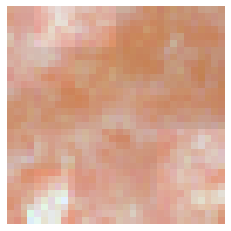

In [21]:
from pylab import plt
# Display image and label.
train_features = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")

img_all_bands = train_features[0]
img = img_all_bands[0:3,:,:]

img = np.moveaxis(img.numpy(), 0, -1)
print(f"img shape: {img.shape}")

figure = plt.figure()
plt.axis("off")
plt.imshow(np.clip(img / np.max(img),0,1))

plt.show()